In [1]:
from PIL import Image
import pytesseract
import json

In [2]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
pytesseract.pytesseract.tesseract_cmd = config['DEFAULT']['tesseract_cmd']
custom_config = config['DEFAULT']['tesseract_config']

ocr result :  HORE MASTER HARDWARE & ELECTRICAL | NO113G &115G, JALAN SETIA GEMBILANG | U1WHG BANDAR SETIA ALAM, 40170 BANDAR SETIA ALAM, SELANGOR. Company Reg No. SA03711951-F GST Reg No. 001637511168 TAX IROICE Involee Mo: C3. 47832 Date: 22/12/2017 14:03 Cashler #: CASHIER RM Code 24NIMN7Y M.ONE TAPE 1.00 ¥ 19.90 15.90 SR Subtotal : 15.90 TotalExclofGST  -—S>—15.00 Total Incl, of GST 15.90 TotalAmtRounded «15.90 Payment : 50.00 Change Due : 34.10 . Total item(e) : 1 G utimary Amouni(RM) Tax (RM) SR @e% 18.00 0.90 SMU REF arasgepyi RN ARY GOODS RETURN PLEASE 00 WITHIN 7 DAYS WITH ORIGINAL RECEIPT Ta” 
label :  {'company': 'HOME MASTER HARDWARE & ELECTRICAL', 'date': '22/12/2017', 'address': 'NO.113G & 115G, JALAN SETIA GEMBILANG U13/BG BANDAR SETIA ALAM, 40170 BANDAR SETIA ALAM, SELANGOR.', 'total': '15.90'}


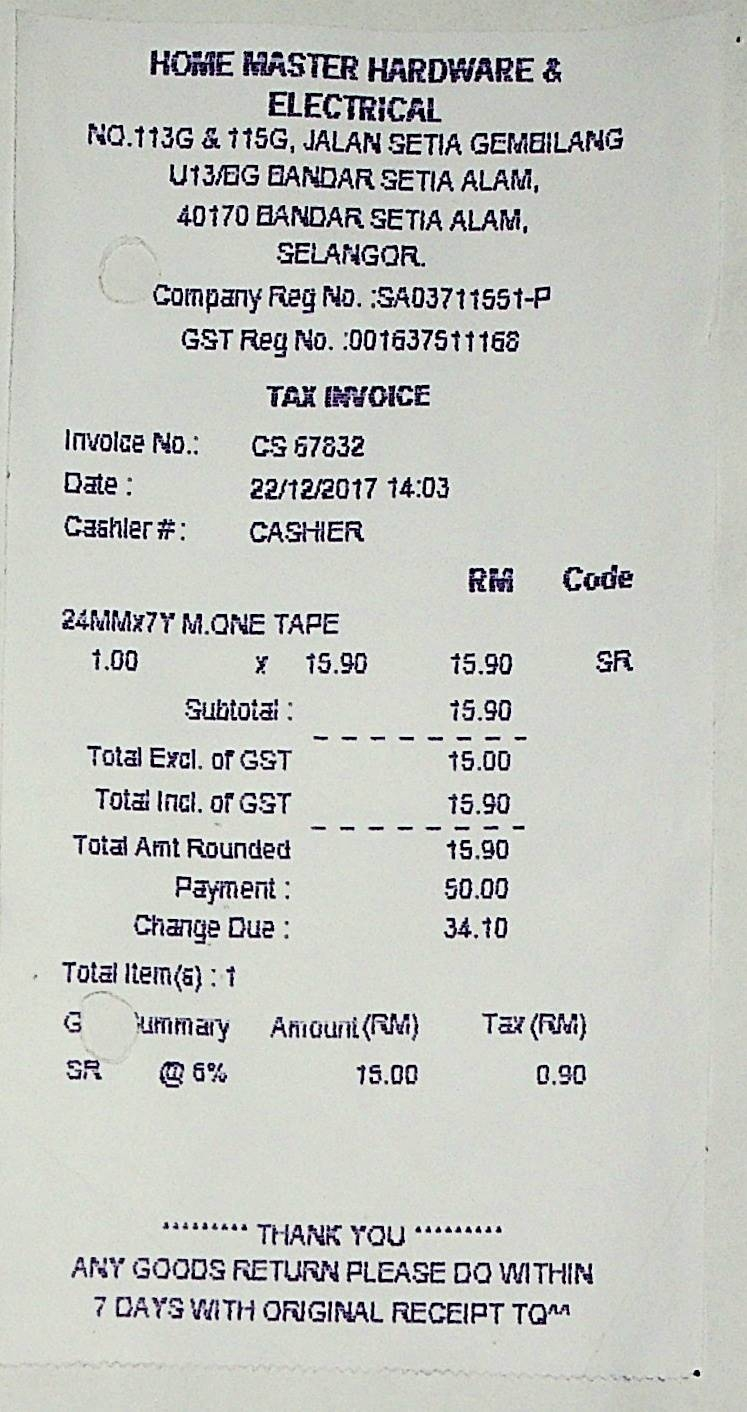

In [3]:
# loading data
texts = []

id = '004'
id = '009'
id = '013'
id = '015'
# id = '019'
# img_file_path = fr'ICDAR-2019-SROIE/data/img/{id}.jpg'
# key_file_path = fr'ICDAR-2019-SROIE/data/key/{id}.json'

img_file_path = fr'data/example data/{id}.jpg'
key_file_path = fr'data/example data/{id}.json'



img = Image.open(img_file_path)

text = pytesseract.image_to_string(img,config=custom_config)
text = text.replace('\t',' ').replace('\n', ' ')

with open(key_file_path) as fp:
    label = json.load(fp)
    
print('ocr result : ',text)
print('label : ', label)
img

In [4]:
from model.seq2seq_model import normalizeString,load_checkpoint_model,evaluate,device
print('start extracting')
print('ocr result : ')
print(text)
print('target :')
print(label)

input_sentence = normalizeString(text)
target = normalizeString(str(label))
encoder1, attn_decoder1 = load_checkpoint_model()

output_words, attentions = evaluate(encoder1, attn_decoder1, input_sentence)
print('exracted : ')
print(' '.join(output_words))

Reading lines...
Read 626 sentence pairs
Trimmed to 626 sentence pairs
Counting words...
Counted words:
ocr 19011
json 2584
start extracting
ocr result : 
HORE MASTER HARDWARE & ELECTRICAL | NO113G &115G, JALAN SETIA GEMBILANG | U1WHG BANDAR SETIA ALAM, 40170 BANDAR SETIA ALAM, SELANGOR. Company Reg No. SA03711951-F GST Reg No. 001637511168 TAX IROICE Involee Mo: C3. 47832 Date: 22/12/2017 14:03 Cashler #: CASHIER RM Code 24NIMN7Y M.ONE TAPE 1.00 ¥ 19.90 15.90 SR Subtotal : 15.90 TotalExclofGST  -—S>—15.00 Total Incl, of GST 15.90 TotalAmtRounded «15.90 Payment : 50.00 Change Due : 34.10 . Total item(e) : 1 G utimary Amouni(RM) Tax (RM) SR @e% 18.00 0.90 SMU REF arasgepyi RN ARY GOODS RETURN PLEASE 00 WITHIN 7 DAYS WITH ORIGINAL RECEIPT Ta” 
target :
{'company': 'HOME MASTER HARDWARE & ELECTRICAL', 'date': '22/12/2017', 'address': 'NO.113G & 115G, JALAN SETIA GEMBILANG U13/BG BANDAR SETIA ALAM, 40170 BANDAR SETIA ALAM, SELANGOR.', 'total': '15.90'}
exracted : 
{'company': 'unihakka int